In [ ]:
#                                      :: ::     CapsNets for Ocean      :: ::

In [ ]:
#                                      ::   OH MY TENSORFLOW AND KERAS  ::

In [ ]:
#                                             WHAT I GIVE YOUR NAME? ;-)

In [ ]:
#                                                   "SERENITY"

In [ ]:
#                                       i thought that you forget my "Athena"

Epoch 1/10000
11/11 [==============================] - 1s 21ms/step - loss: 0.0914 - mae: 0.2357 - val_loss: 0.0948 - val_mae: 0.2466
Epoch 2/10000
11/11 [==============================] - 0s 10ms/step - loss: 0.0848 - mae: 0.2311 - val_loss: 0.0989 - val_mae: 0.2495
Epoch 3/10000
11/11 [==============================] - 0s 10ms/step - loss: 0.0822 - mae: 0.2269 - val_loss: 0.0917 - val_mae: 0.2409
Epoch 4/10000
11/11 [==============================] - 0s 8ms/step - loss: 0.0808 - mae: 0.2242 - val_loss: 0.0971 - val_mae: 0.2482
Epoch 5/10000
11/11 [==============================] - 0s 8ms/step - loss: 0.0804 - mae: 0.2214 - val_loss: 0.0931 - val_mae: 0.2442
Epoch 6/10000
11/11 [==============================] - 0s 8ms/step - loss: 0.0808 - mae: 0.2239 - val_loss: 0.0926 - val_mae: 0.2468
Epoch 7/10000
11/11 [==============================] - 0s 10ms/step - loss: 0.0806 - mae: 0.2213 - val_loss: 0.0972 - val_mae: 0.2458
Epoch 8/10000
11/11 [==============================] - 0s 8ms/ste

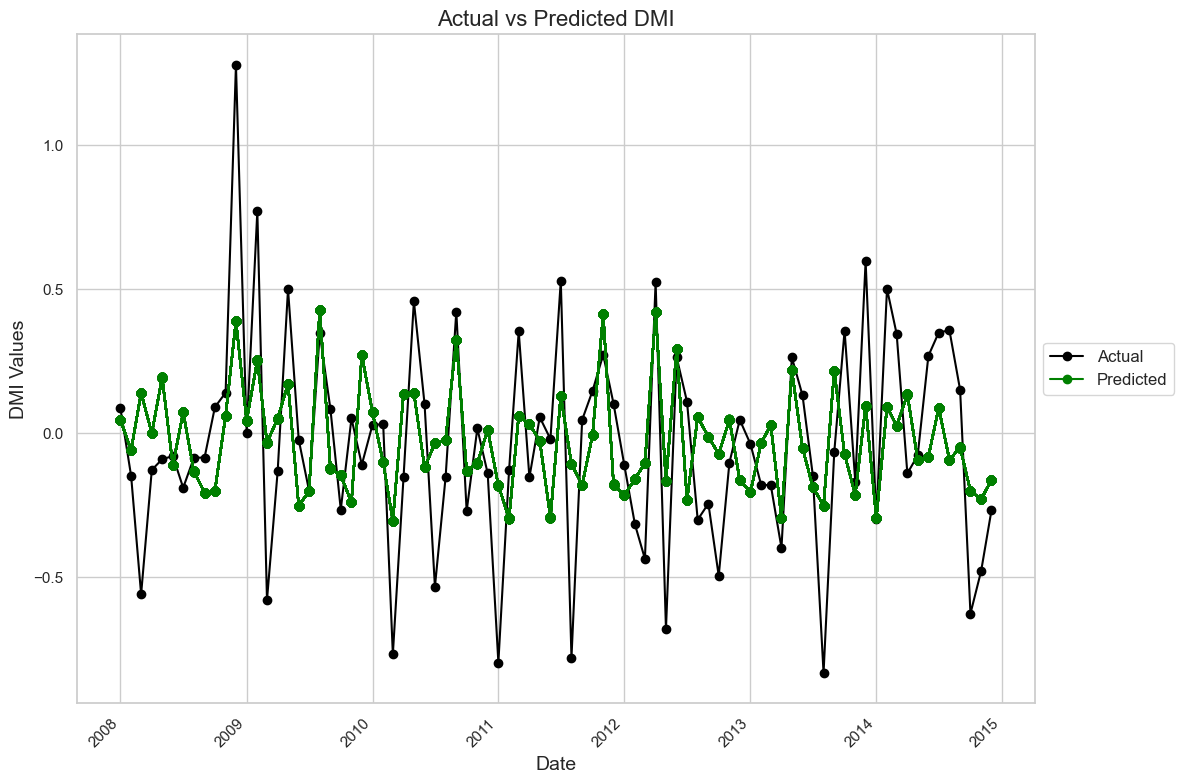

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns




#                                        < ::         THE OCEAN       :: >
#                                 <<    ::  ONE LAYER, ONE OCEAN, ONE LIFE  ::    >> 
#                                          ::      THE LAYER START    ::


# Define the CapsuleLayer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, capsule_dim, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.capsule_dim = capsule_dim
        self.routings = routings

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(
            name='capsule_kernel',
            shape=(self.num_capsules, input_dim, self.capsule_dim),
            initializer='glorot_uniform',
            trainable=True)

    def call(self, inputs, **kwargs):
        input_expand = tf.keras.backend.expand_dims(inputs, 1)
        input_tiled = tf.keras.backend.tile(input_expand, [1, self.num_capsules, 1, 1])

        # Compute `u_hat` using tf.linalg.matmul
        u_hat_vectors = tf.linalg.matmul(input_tiled, self.W)

        # Return the output of the routing procedure
        return u_hat_vectors

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsules, self.capsule_dim])

# Define the Capsule Network model
class CapsuleNetwork(models.Model):
    def __init__(self, input_shape, num_capsules, capsule_dim, routings):
        super(CapsuleNetwork, self).__init__()
#        self.conv1 = layers.Conv1D(256, kernel_size=3, activation='relu', input_shape=input_shape)
        self.conv1 = layers.Conv1D(256, kernel_size=3, activation='linear', input_shape=input_shape)   
        self.capsule_layer = CapsuleLayer(num_capsules=num_capsules, capsule_dim=capsule_dim, routings=routings)
        self.flatten = layers.Flatten()
#        self.dense1 = layers.Dense(128, activation='relu')
        self.dense1 = layers.Dense(128, activation='linear')
        
    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        primary_capsule = self.capsule_layer(x)
        output = self.flatten(primary_capsule)
        output = self.dense1(output)
        return output


    
#                                          ::      THE LAYER END    ::

#                                     ::     IT CAN BE APPLY EVERYWHERE     ::

#                                              ::  Cheers! :) :-) ::  
#                                                 Subhadeep 


# Load your dataset
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Remove 'MEIv2' from features
features = df[['AAO', 'AO', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']]
target = df['DMI']

# Split the data into training and testing sets        (HERE IS THE MAGIC IN OCEAN)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=500)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 11, 1))  # Adjust the shape based on the number of features
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 11, 1))

# Create the Capsule Network model
model = CapsuleNetwork(input_shape=(11, 1), num_capsules=10, capsule_dim=16, routings=3)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and record history for plotting
history = model.fit(X_train_reshaped, y_train, epochs=10000, validation_data=(X_test_reshaped, y_test))

# Predictions on the test set
predictions = model.predict(X_test_reshaped)

# Set seaborn style
sns.set(style="whitegrid")



#      THIS IS LIKE APLOT
# Plot actual and predicted values against DATE
plt.figure(figsize=(12, 8))
plt.plot(df['DATE'].iloc[-len(y_test):], y_test, label='Actual', marker='o', color='black')
plt.plot(df['DATE'].iloc[-len(predictions):], predictions, label='Predicted', marker='o', color='green')
plt.xlabel('Date', fontsize=14)
plt.ylabel('DMI Values', fontsize=14)
plt.title('Actual vs Predicted DMI', fontsize=16)

# Move legend to the right outside the main figure
plt.legend(['Actual', 'Predicted'], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



In [ ]:
#                          ::                < HELLO DONT INCRISE TO MUCH >                 ::

In [ ]:
#                                                       EPOCHS

In [ ]:
#                                                  POWER OF EPOCHS!

In [ ]:
#                                                  MINERVA :) :) ;-)

In [ ]:
#                           (     :::     Effervescent romance engulfing me   :::     )

In [ ]:
#                                                      HOT | BATs